# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [9]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [10]:
##browser = Browser('chrome')
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [11]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
#url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
#browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [12]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(page.content, 'html.parser')

In [13]:
# Extract all rows of data
rows = soup.find_all('tr')

# Print the rows
for row in rows:
    print(row)

<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [14]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
rows = soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Print the list of rows
for row in data:
    print(row)

[]
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05'

In [15]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# List of column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Assuming 'data' is the list of rows created earlier

# Create Pandas DataFrame
df = pd.DataFrame(data, columns=column_names)

In [16]:
# Confirm DataFrame was created successfully
# Print the DataFrame
print(df)

        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
# Print data types of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [18]:
# Change data types for data analysis
# Replace missing values in 'sol', 'ls', and 'month' columns with 0
df['sol'] = df['sol'].fillna(0).astype(int)
df['ls'] = df['ls'].fillna(0).astype(int)
df['month'] = df['month'].fillna(0).astype(int)


In [19]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                  object
terrestrial_date    object
sol                  int32
ls                   int32
month                int32
min_temp            object
pressure            object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?
# Count the number of unique months on Mars
num_months = df['month'].nunique()

# Print the number of months on Mars
print("Number of months on Mars:", num_months)

Number of months on Mars: 13


In [21]:
# 2. How many Martian days' worth of data are there?
# Count the number of unique sols (Martian days)
num_sols = df['sol'].nunique()

# Print the number of Martian days' worth of data
print("Number of Martian days' worth of data:", num_sols)

Number of Martian days' worth of data: 1868


In [22]:
# 3. What is the average low temperature by month?
# Convert 'min_temp' column to numeric after cleaning
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Calculate the average minimum daily temperature for each month
average_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and warmest months
coldest_month = average_temp_by_month.idxmin()
warmest_month = average_temp_by_month.idxmax()

# Print the coldest and warmest months
print("Warmest month on Mars:", warmest_month)
print("Average low temperature for each month:")
print(average_temp_by_month)




Warmest month on Mars: 8
Average low temperature for each month:
month
0           NaN
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


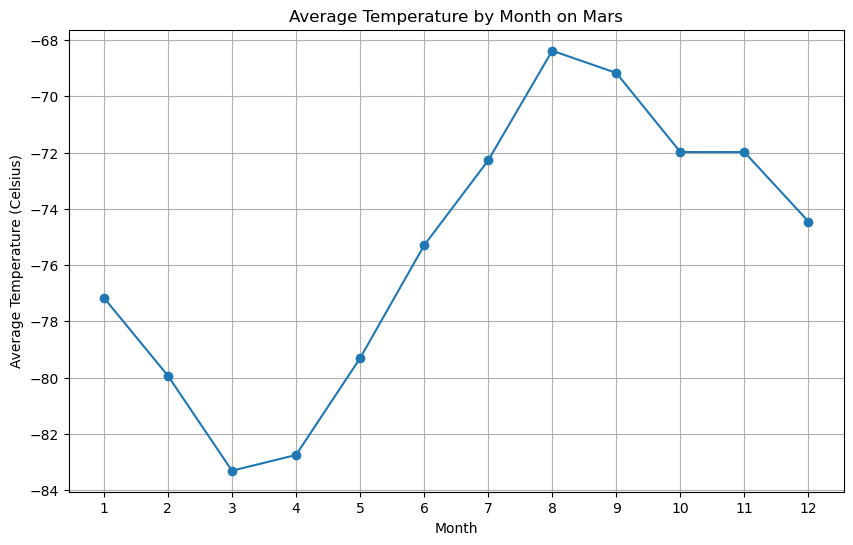

In [23]:
# Plot the average temperature by month
import matplotlib.pyplot as plt

# Plotting the average temperature by month
plt.figure(figsize=(10, 6))
average_temp_by_month.plot(marker='o')
plt.title('Average Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


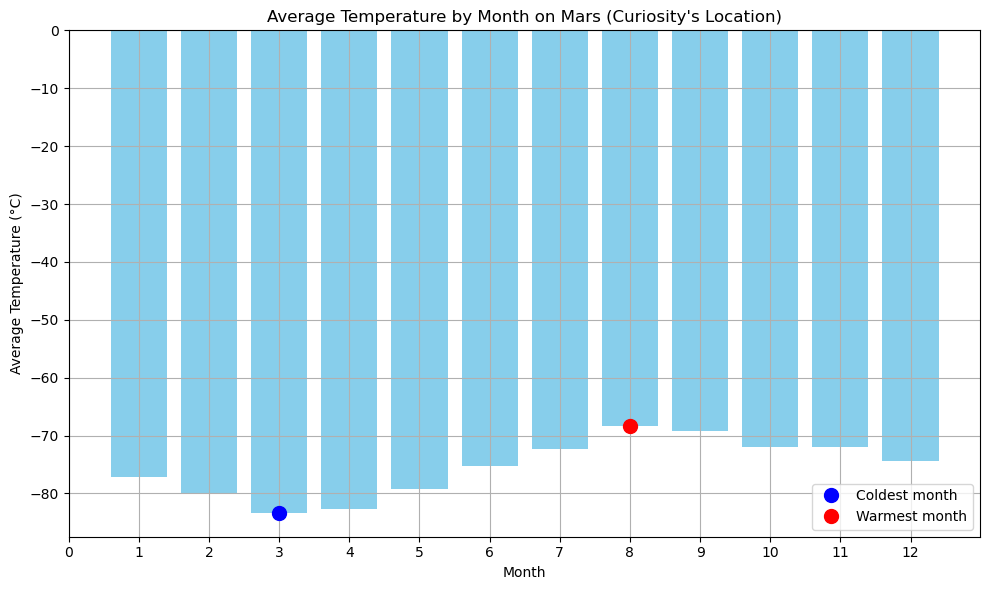

In [24]:
# Identify the coldest and hottest months in Curiosity's location

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
plt.bar(average_temp_by_month.index, average_temp_by_month, color='skyblue')

# Highlight the coldest and hottest months
plt.plot(coldest_month, average_temp_by_month[coldest_month], 'bo', markersize=10, label='Coldest month')
plt.plot(warmest_month, average_temp_by_month[warmest_month], 'ro', markersize=10, label='Warmest month')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Month on Mars (Curiosity\'s Location)')
plt.xticks(average_temp_by_month.index)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# 4. Average pressure by Martian month
# Clean the pressure column and convert it to numeric type
df['pressure'] = df['pressure'].str.replace('.', '').astype(float)

# Calculate the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display the result
print(average_pressure_by_month)


month
0             NaN
1     8624.885057
2     8894.550562
3     8773.229167
4     8063.298969
5     7485.570470
6     7450.544218
7     7951.056338
8     8738.297872
9     9133.059701
10    8873.125000
11    8570.144928
12    8421.566265
Name: pressure, dtype: float64


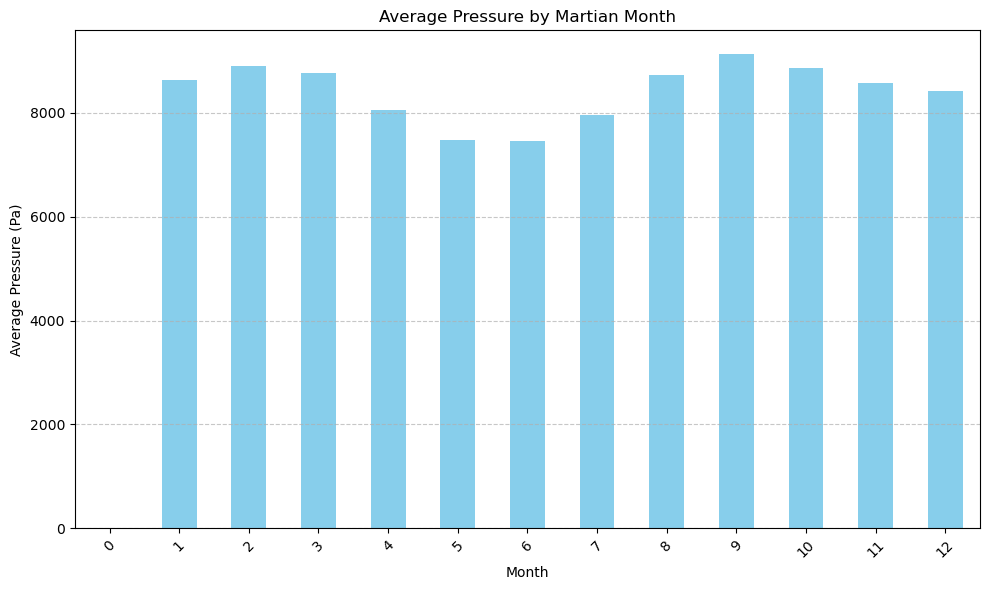

In [26]:
# Plot the average pressure by month
import matplotlib.pyplot as plt

# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


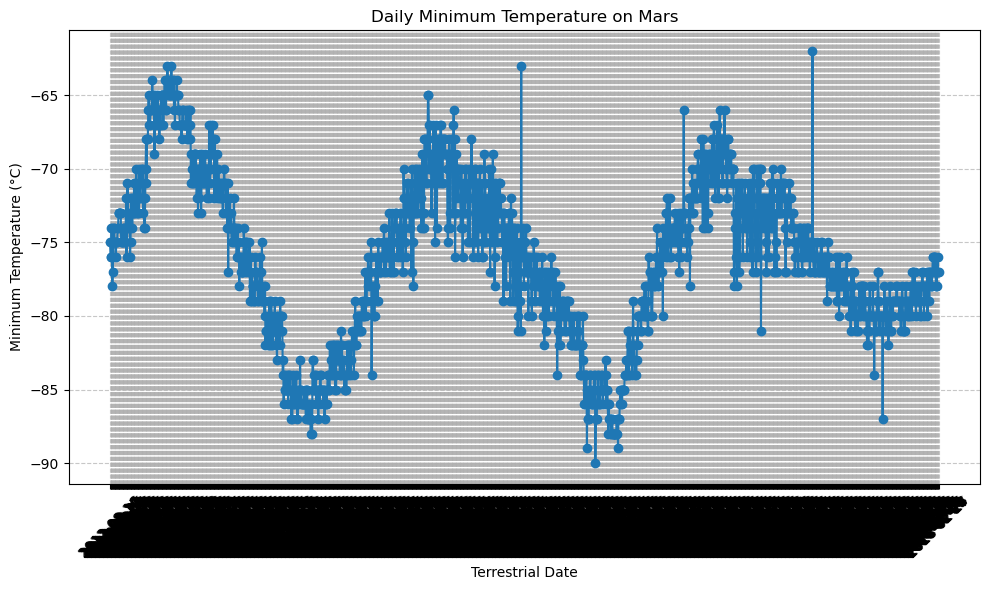

In [28]:
# 5. How many terrestrial (earth) days are there in a Martian year?


import matplotlib.pyplot as plt

# Drop rows with None values in the 'terrestrial_date' column
df_cleaned = df.dropna(subset=['terrestrial_date'])

# Plotting the daily minimum temperature against time
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['terrestrial_date'], df_cleaned['min_temp'], marker='o', linestyle='-')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [30]:
# Write the data to a CSV

df.to_csv('mars_weather_data.csv', index=False)


In [21]:
browser.quit()